In [1]:
import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

x = np.array(12)
print(x.ndim)
train_images.shape,train_labels.shape,test_images.shape,test_labels.shape

0


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

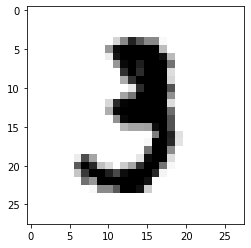

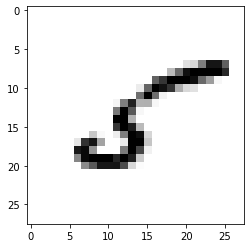

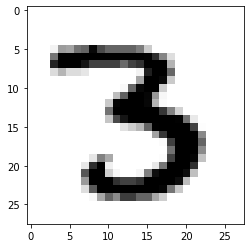

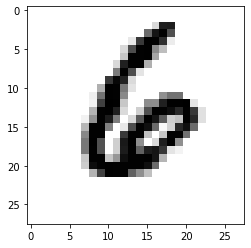

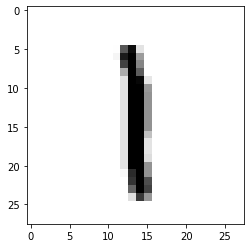

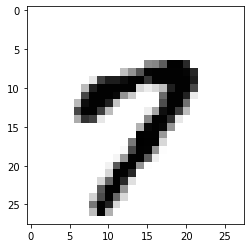

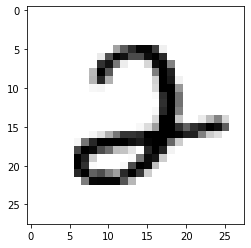

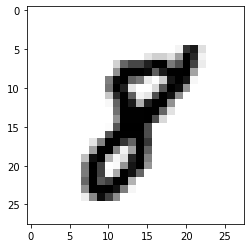

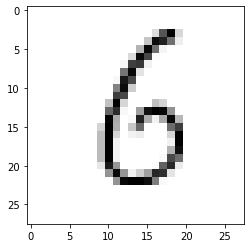

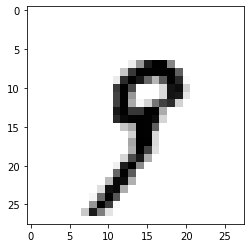

In [2]:
# for i in range(10,20):
#     plt.imshow(train_images[i], cmap=plt.cm.binary)
#     plt.show()

In [3]:
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32')/255

test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32')/255

In [17]:
# Random Forest: default hyperparameters
from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split
from sklearn import metrics

model_default = RandomForestClassifier(n_estimators=100, random_state=0)
model_default.fit(train_images, train_labels)
test_predict_default = model_default.predict(test_images)

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       999
           1       0.99      0.99      0.99      1135
           2       0.97      0.96      0.97      1038
           3       0.96      0.96      0.96      1008
           4       0.98      0.98      0.98       975
           5       0.97      0.97      0.97       892
           6       0.98      0.97      0.98       968
           7       0.96      0.97      0.97      1018
           8       0.95      0.96      0.96       963
           9       0.96      0.96      0.96      1004

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



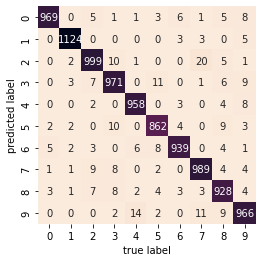

In [18]:
import seaborn as sn
import pandas as pd

print(metrics.classification_report(test_predict_default, test_labels))
mat = metrics.confusion_matrix(test_labels, test_predict_default)
sn.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap=sn.cm.rocket_r)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [11]:
# Random Forest: tuning hyperparameters
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import train_test_split
from sklearn import metrics

param_grid = {
    'n_estimators': [20, 50, 100, 200],
    'max_depth': [10, 30, 50, 80, 100, None],
    'max_features': ["auto", "sqrt"],
    'criterion': ['gini', 'entropy']
}

model_default = RandomForestClassifier(n_estimators=100, random_state=0)

grid_search = GridSearchCV(estimator=model_default, param_grid=param_grid, n_jobs=-1,
                           verbose=2, cv=3, return_train_score=True)

# model_default.fit(train_images, train_labels)
# test_predict = model_default.predict(test_images)

In [12]:
grid_search.fit(train_images, train_labels)

Fitting 3 folds for each of 96 candidates, totalling 288 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 30, 50, 80, 100, None],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [20, 50, 100, 200]},
             return_train_score=True, verbose=2)

In [13]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 30,
 'max_features': 'auto',
 'n_estimators': 200}

In [15]:
model_best = grid_search.best_estimator_
test_predict = model_best.predict(test_images)

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1000
           1       0.99      0.99      0.99      1134
           2       0.97      0.96      0.97      1040
           3       0.97      0.96      0.96      1019
           4       0.97      0.98      0.97       979
           5       0.96      0.97      0.97       883
           6       0.98      0.98      0.98       955
           7       0.96      0.97      0.97      1018
           8       0.95      0.96      0.96       964
           9       0.95      0.96      0.95      1008

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



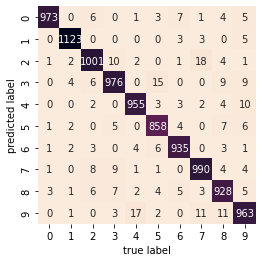

In [16]:
print(metrics.classification_report(test_predict, test_labels))
mat = metrics.confusion_matrix(test_labels, test_predict)
sn.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap=sn.cm.rocket_r)
plt.xlabel('true label')
plt.ylabel('predicted label');

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       993
           1       0.99      0.99      0.99      1134
           2       0.97      0.96      0.97      1038
           3       0.97      0.97      0.97      1008
           4       0.98      0.98      0.98       981
           5       0.97      0.98      0.97       886
           6       0.98      0.97      0.98       965
           7       0.97      0.97      0.97      1021
           8       0.96      0.96      0.96       970
           9       0.95      0.96      0.96      1004

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



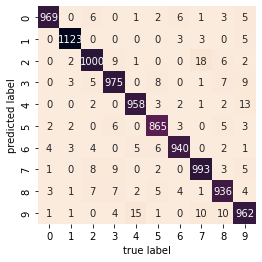

In [20]:
model_test1 = RandomForestClassifier(n_estimators=1000)
model_test1.fit(train_images, train_labels)
test_predict_test1 = model_test1.predict(test_images)

print(metrics.classification_report(test_predict_test1, test_labels))
mat = metrics.confusion_matrix(test_labels, test_predict_test1)
sn.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap=sn.cm.rocket_r)
plt.xlabel('true label')
plt.ylabel('predicted label');